# Discussion: Node-link Diagram vs. ExMatrix

For the discussion, we explore a single Decision Tree from the use case, where we utilize the Wisconsin Breast Cancer Diagnostic (WBCD) dataset from the UCI Machine Learning Repository.

***Cite us***:  M. Popolin Neto and F. V. Paulovich, "Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles," in IEEE Transactions on Visualization and Computer Graphics, vol. 27, no. 2, pp. 1427-1437, Feb. 2021, doi: 10.1109/TVCG.2020.3030354.

***BibTeX:*** @article{PopolinNeto:2020:ExMatrix,
    author={Popolin{ }Neto, Mário and Paulovich, Fernando V.},
    journal={IEEE Transactions on Visualization and Computer Graphics}, 
    title={Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles}, 
    year={2021},
    volume={27},
    number={2},
    pages={1427-1437},
    doi={10.1109/TVCG.2020.3030354}}
    
***WARNING***: The code below must be used along with exmatrix package version **0.1.0**. 

Improvements and naive bugs have been addressed in new versions. Thus, such new versions will require specific changes in the code and will generate slightly different visualizations. At last, it is recommended the usage of the latest version.

It is worth mentioning that starting from version **0.1.3** rule property "coverage" was renamed to "support" to be consistent with logic rules literature.

In [1]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data_file = 'wdbc.data'
feature_names = np.array( [ 'radius mean', 'texture mean', 'perimeter mean', 'area mean', 'smoothness mean', 'compactness mean', 'concavity mean', 'concave mean', 'symmetry mean', 'fractal dimension mean', 'radius std', 'texture std', 'perimeter std', 'area std', 'smoothness std', 'compactness std', 'concavity std', 'concave std', 'symmetry std', 'fractal dimension std', 'radius worst', 'texture worst', 'perimeter worst', 'area worst', 'smoothness worst', 'compactness worst', 'concavity worst', 'concave worst', 'symmetry worst', 'fractal dimension worst' ] )


dataset = np.genfromtxt( './' + data_file, delimiter = ',', skip_header = 0, dtype = 'str' )

X = dataset[ :, 2: ].astype(float)
y = dataset[ :, 1 ]


target_names = np.unique( y ).astype(str)

y = [ s.replace('B', '0') for s in y ]
y = [ s.replace('M', '1') for s in y ]
y = np.array( y ).astype(int)


sss = list( StratifiedShuffleSplit( n_splits = 1, test_size = 0.30, random_state = 1642 ).split( X, y ) )
train_indexes = sss[ 0 ][ 0 ]
test_indexes = sss[ 0 ][ 1 ]

X_train, X_test = X[ train_indexes ], X[ test_indexes ]
y_train, y_test = y[ train_indexes ], y[ test_indexes ]


kargs = eval( "{'criterion': 'gini', 'n_estimators': 128, 'max_depth': None, 'random_state': 1642, 'bootstrap': False}" )
clf = RandomForestClassifier( **kargs )
clf.fit( X_train, y_train )


y_true, y_pred = y_test, clf.predict( X_test )
accuracy = accuracy_score( y_true, y_pred )
print( 'accuracy RF-128', accuracy )

accuracy RF-128 0.9941520467836257


In [2]:
from exmatrix.treevis import nodelink

tree = nodelink( clf[ 49 ], out_file = None, max_depth = None, feature_names = feature_names, class_names = target_names, label = 'all', filled = True, leaves_parallel = False, impurity = False, node_ids = True, proportion = True, rotate = False, rounded = True, special_characters = False, precision = 2 )
tree.write_svg( 'DT49.svg' )

True



Decision Tree 49 as node-link diagram from a Random Forest model with 128 trees.

<!-- ![Alt text](./DT49.svg) -->
<img src="./DT49.svg">



In [3]:
from exmatrix import ExplainableMatrix

exm = ExplainableMatrix( n_features = len( feature_names ), n_classes = len( target_names ), feature_names = np.array( feature_names ), class_names = np.array( target_names ), precision = 3 )
exm.rule_extration( clf, X, y, clf.feature_importances_ )
print( 'n_rules RF-128', exm.n_rules_ )

n_rules RF-128 3278


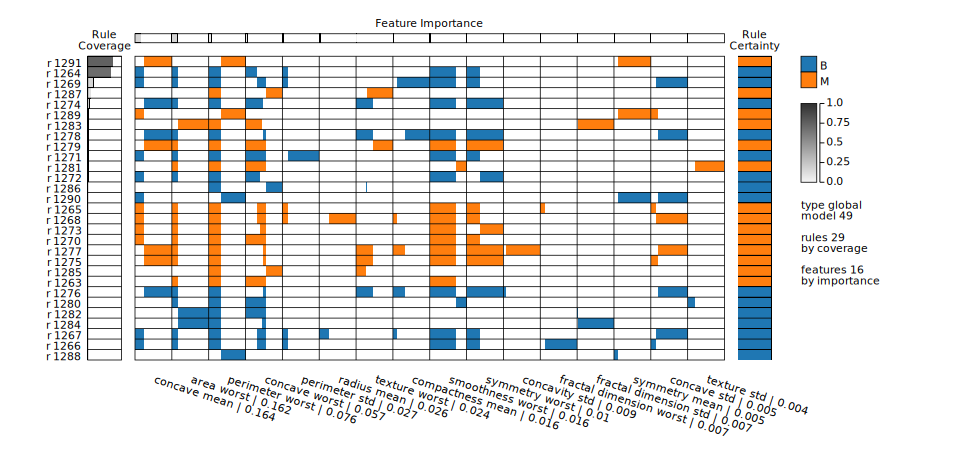

In [4]:
exp = exm.explanation( r_model = 49, r_order = 'coverage', f_order = 'importance' )
exp.create_svg( draw_row_labels = True, draw_rows_line = True, draw_col_labels = True, draw_cols_line = True, col_label_degrees = 18, height = 1000, margin_bottom = 200, stroke_width = 1.75, font_size = 24 )
exp.save( 'BreastCancerGE-DT49.png', pixel_scale = 5 )
exp.display_jn()



Decision path to leaf node 18 manually highlighted on the node-link diagram.

<img src="./DT49N18.svg">



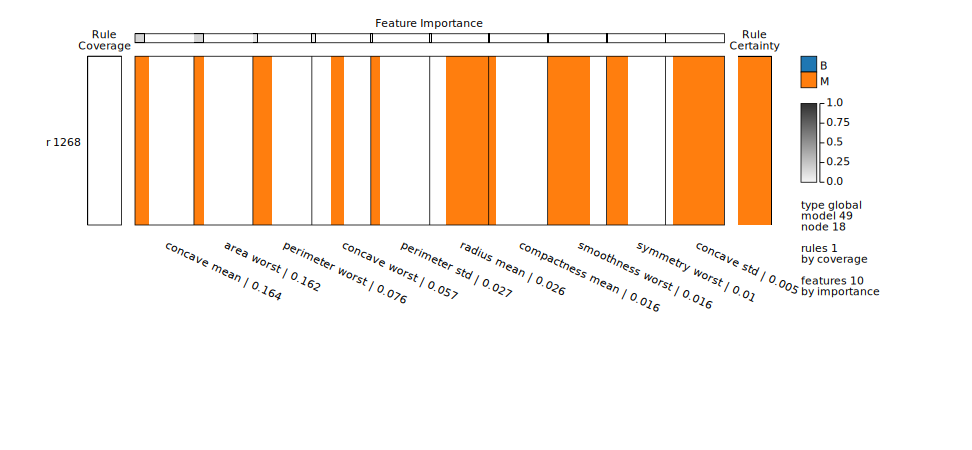

In [5]:
exp = exm.explanation( r_model = 49, r_node = 18, r_order = 'coverage', f_order = 'importance' )
exp.create_svg( draw_row_labels = True, draw_rows_line = True, draw_col_labels = True, draw_cols_line = True, col_label_degrees = 25, height = 1000, margin_bottom = 500, stroke_width = 1.75, font_size = 24 )
exp.save( 'BreastCancerGE-DT49N18.png', pixel_scale = 5 )
exp.display_jn()